# 数据拟合


In [1]:
import numpy as np #Numpy是使用C语言实现的一个数据计算库，它用来处理相同类型，固定长度的元素。
#使用numpy操作数据时，系统运行的速度比使用python代码快很多。numpy中还提供了很多的数据处理函数，例如傅里叶变化，矩阵操作，数据拟合等操作
import pandas as pd #Pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。
#Pandas纳入了大量库和一些标准的数据模型，提供了大量能使我们快速便捷地处理数据的函数和方法
import matplotlib.pyplot as plt #2D绘图库。提供一个类似matlab的绘图框架

In [2]:
data = pd.read_csv('data.txt', header=None, names=['mins', 'findpicks']) #header:指定标题行

data.head()

,mins,findpicks
0,443,50
1,436,51
2,437,50
3,441,48
4,433,47


In [3]:
data=(data-data.mean())/data.std() #std:计算标准差
data.head()

,mins,findpicks
0,0.229953,-1.316733
1,-0.004258,-1.193883
2,0.029200,-1.316733
3,0.163035,-1.562434
4,-0.104634,-1.685284


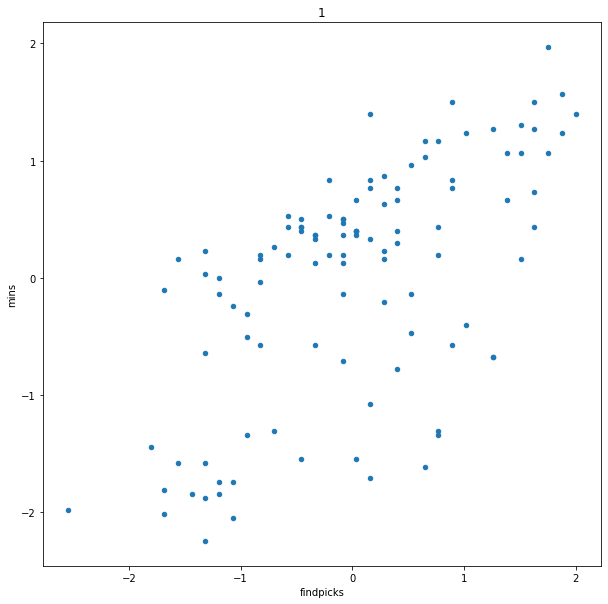

In [4]:
data.plot(kind='scatter',title='1',x='findpicks',y='mins',figsize=(10,10)) #scatter:散点图 figsize：宽高
plt.show()

#### 梯度下降
这个部分需要在现有数据集上，训练线性回归的参数θ

In [5]:
#定义costFunction
def computeCost(X,y,theta,reg): 
    inner=np.power((X*theta.T)-y,2) #power(x, y):计算 x 的 y 次方,theta.T:theta的转置
    m = X.shape[0]
    cost=np.sum(inner)/(2*len(X))
    reg_term = (reg / (2 * m)) * np.power(theta[1:], 2).sum()
    cost+=reg_term
    return cost

In [6]:
#data.insert(0,'Ones',1) #在data的第0列插入1，名为Ones，用于更新θ0

In [7]:
#变量初始化
cols=data.shape[1] #读取data列数 若shape[0]则是行数
X=data.iloc[:,:-1] #X是data里的除最后列，前面的冒号就是取行数，后面的冒号是取列数
y=data.iloc[:,1:] #y是data最后一列 

In [8]:
data.head() #head函数可以默认读取前5行的数据

,mins,findpicks
0,0.229953,-1.316733
1,-0.004258,-1.193883
2,0.029200,-1.316733
3,0.163035,-1.562434
4,-0.104634,-1.685284


In [9]:
X.head()

,mins
0,0.229953
1,-0.004258
2,0.029200
3,0.163035
4,-0.104634


In [10]:
y.head()

,findpicks
0,-1.316733
1,-1.193883
2,-1.316733
3,-1.562434
4,-1.685284


In [11]:
X=np.matrix(X.values) #用于从类数组对象或数据字符串返回矩阵
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

In [12]:
X.shape,y.shape,theta.shape,theta

((110, 1), (110, 1), (1, 2), matrix([[0, 0]]))

In [13]:
#computeCost(X,y,theta,1)

In [14]:
#扩展特征
#写一个函数，输入原始X，和幂的次数p，返回X的1到p次幂
def poly_features(x, power, as_ndarray=False): #特征映射
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data,index=[0]) #类似excel，是一种二维表。
    return df.values if as_ndarray else df

In [15]:
X

matrix([[ 0.22995254],
        [-0.00425838],
        [ 0.02920032],
        [ 0.16303513],
        [-0.10463449],
        [ 0.19649384],
        [-0.13809319],
        [-0.57305633],
        [-1.07493687],
        [-1.34260649],
        [-1.57681741],
        [-1.30914779],
        [-1.4429826 ],
        [-1.74411092],
        [-1.61027611],
        [-1.5433587 ],
        [-0.63997373],
        [ 0.16303513],
        [-0.57305633],
        [-0.70689114],
        [ 0.76529178],
        [-0.47268022],
        [ 0.83220919],
        [ 0.39724605],
        [ 0.19649384],
        [-0.77380854],
        [ 1.06642011],
        [ 1.40100713],
        [ 1.26717232],
        [ 0.16303513],
        [ 0.83220919],
        [ 0.39724605],
        [ 1.16679621],
        [ 0.46416346],
        [ 0.39724605],
        [-0.2050106 ],
        [ 1.56830065],
        [ 1.96980508],
        [ 1.06642011],
        [ 0.76529178],
        [ 0.66491567],
        [ 1.26717232],
        [ 0.12957643],
        [ 0

In [16]:
X=np.ravel(X)
#ravel：扁平化函数
#poly_features(X, power=3)
X=np.power(X,3)

In [17]:
X

array([ 1.21594694e-02, -7.72206309e-08,  2.48979126e-05,  4.33354796e-03,
       -1.14557774e-03,  7.58659312e-03, -2.63339979e-03, -1.88188003e-01,
       -1.24207801e+00, -2.42017196e+00, -3.92052491e+00, -2.24370640e+00,
       -3.00457659e+00, -5.30545096e+00, -4.17542848e+00, -3.67621267e+00,
       -2.62111723e-01,  4.33354796e-03, -1.88188003e-01, -3.53230023e-01,
        4.48209595e-01, -1.05609329e-01,  5.76364891e-01,  6.26871852e-02,
        7.58659312e-03, -4.63340816e-01,  1.21278823e+00,  2.74992621e+00,
        2.03473116e+00,  4.33354796e-03,  5.76364891e-01,  6.26871852e-02,
        1.58849201e+00,  1.00002956e-01,  6.26871852e-02, -8.61646103e-03,
        3.85734039e+00,  7.64310382e+00,  1.21278823e+00,  4.48209595e-01,
        2.93967766e-01,  2.03473116e+00,  2.17559492e-03,  7.98985686e-02,
       -2.24370640e+00, -3.05409181e-01, -5.00593464e+00,  2.74992621e+00,
        1.87777295e+00,  1.21278823e+00,  5.76364891e-01,  1.23225088e-01,
        1.23225088e-01,  

#### 梯度下降

一个检查梯度下降是不是在正常运作的方式，是打印出每一步J()的值，看他是不是一直都在减小，并且最后收敛至一个稳定的值。
最后的结果会用来预测小吃店在35000及70000人城市规模的利润

In [32]:
def gradient(theta, X, y,reg):
    m = X.shape[0]

    inner = (1/m)*X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)
    
    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta
    regularized_term = (reg / m) * regularized_term
    inner+=regularized_term


    return inner

In [34]:
gradient(theta, X, y, 1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 110)

In [20]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

ValueError: shapes (110,) and (2,1) not aligned: 110 (dim 0) != 2 (dim 0)

In [ ]:
predict1=[1,3.5]*g.T
print("predict1:",predict1)
predict2=[1,7]*g.T
print("predict2:",predict2)

In [ ]:
x=np.linspace(data.findpicks.min(),data.findpicks.max(),110) #创建等差数列
f=g[0,0]+(g[0,1]*x)
fig,ax=plt.subplots(figsize=(12,8)) #fig:绘图窗口(Figure),ax:绘图窗口上的坐标系(axis),figsize:子图的宽度和高度
ax.plot(x,f,'r',label='pre') #'r':红线，label：定义图例
ax.scatter(data.findpicks,data.mins,label='data') #散点图                                                                                                                                                                                                                                                                                                                                  
ax.legend(loc=2) #在图上标明一个图例，用于说明每条曲线的文字显示，loc参数，用于控制图例的所在象限
ax.set_xlabel('findpicks')
ax.set_ylabel('mins')
ax.set_title('1')
plt.show


# 机4多变量线性回归

In [ ]:
data2=pd.read_csv('4.txt',header=None,names=['Size','Bedrooms','Price'])
data2.head()

#### 特征归一化

In [ ]:
#观察数据发现，size变量是bedrooms变量的1000倍大小,统一量级会让梯度下降收敛的更快。做法就是，将每类特征减去他的平均值后除以标准差
data2=(data2-data2.mean())/data2.std() #std:计算标准差
data2.head()

In [ ]:
# 加一列常数项
data2.insert(0, 'Ones', 1)

# 初始化X和y
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# 运行梯度下降算法
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

#### 正规方程

In [ ]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)，np.linalg.inv()：矩阵求逆
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#这里用的是data1的数据
final_theta2